In [356]:
import numpy as np
import renom as rm
from renom.optimizer import Adam
from renom.optimizer import Sgd
import matplotlib.pyplot as plt

In [357]:
# XOR の入力 X と出力 y を配列で定義
X = np.array([[1,1],
            [1,0],
            [0,1],
            [0,0]])

y = np.array([[1],
             [0],
             [0],
             [1]])

In [358]:
# チュートリアルではクラス名が Mnist になっているので、修正
class Xor(rm.Model):
    def __init__(self):                         # 入力は2次元
        self.layer1 = rm.Dense(output_size=50)   # 隠れ層は5次元
        # print(self.layer1._output_size)
        self.layer2 = rm.Dense(1)               #  出力は1次元（0, 1 クラス）
        # print(self.layer2._output_size)
        # Q. rm.Dense(output_size=5) と rm.Dense(5) 同じことだと思うが、書きっぷりが統一されていないだけなのか、別の処理になるのかを教えていただきたいです。

    def forward(self, x):                       # 順伝播の定義
        t1 = self.layer1(x)                     # 入力 x を隠れ層へ渡す
        t2 = rm.relu(t1)                        # 隠れ層の活性化関数はReLU
        t3 = self.layer2(t2)                    # 出力層にReLUの出力を渡す
        return t3

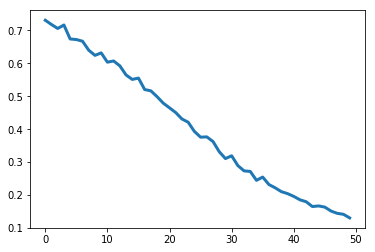

In [359]:
epoch = 50
batch = 1
N = len(X) # 4
optimizer = Sgd(lr=0.1, momentum=0.4)

network = Xor()
learning_curve = []

for i in range(epoch): # エポック分ループを回す
    perm = np.random.permutation(N) # データをランダムに抽出し、学習するために使用
#     print(perm)
    loss = 0
    for j in range(0, N // batch): # ミニバッチ分ループを回す 4回ループ
        train_batch = X[perm[j*batch : (j+1)*batch]]
        response_batch = y[perm[j*batch : (j+1)*batch]]
        with network.train():
            result = network(train_batch)
            l = rm.sigmoid_cross_entropy(result, response_batch)
        grad = l.grad()
        grad.update(optimizer)
        loss += l
        # print(type(loss), loss, type(l), l)
    train_loss = loss / (N // batch)
    learning_curve.append(train_loss)
plt.plot(learning_curve, linewidth=3, label="train")
plt.show()

In [360]:
# これはなんの値？？
print("[0, 0]:{}".format(network([0,0]).as_ndarray()))
print("[1, 1]:{}".format(network([1,1]).as_ndarray()))
print("[1, 0]:{}".format(network([1,0]).as_ndarray()))
print("[0, 1]:{}".format(network([0,1]).as_ndarray()))

[0, 0]:[[1.1943575]]
[1, 1]:[[2.4807048]]
[1, 0]:[[-2.4159863]]
[0, 1]:[[-2.6547163]]
